# 03. News classification with BERT

Author: [ArtyomR](https://github.com/ArtyomR)  
Idea and big part of source code: [Konstantin Shitkov](https://github.com/shitkov)  
Source:

<span style="color:red">This Notebook was tested in Google Colab with GPU.</span>

**In this Notebook I'll walk through News classification with BERT**  
Next steps were implemented.
1. Text preparation, deviding train dataset on train and validation parts
2. BERT classifire initialisation and training
3. Check test data and scoring

Dataset was creted within [Chinese AI news agregation project](https://t.me/chinese_ai_news).  

## Get data from github

In [1]:
!wget https://raw.githubusercontent.com/ArtyomR/AI-News-Classification/main/bert_classifier.py
!wget https://raw.githubusercontent.com/ArtyomR/AI-News-Classification/main/bert_dataset.py
!wget https://raw.githubusercontent.com/ArtyomR/AI-News-Classification/main/ai_articles_test_231124.xlsx
!wget https://raw.githubusercontent.com/ArtyomR/AI-News-Classification/main/ai_articles_train_231124.xlsx

--2023-12-24 15:43:55--  https://raw.githubusercontent.com/ArtyomR/AI-News-Classification/main/bert_classifier.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5278 (5.2K) [text/plain]
Saving to: ‘bert_classifier.py’

bert_classifier.py  100%[===================>]   5.15K  --.-KB/s    in 0s      

2023-12-24 15:43:55 (54.7 MB/s) - ‘bert_classifier.py’ saved [5278/5278]

--2023-12-24 15:43:55--  https://raw.githubusercontent.com/ArtyomR/AI-News-Classification/main/bert_dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89

## Installing Packages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from bert_dataset import CustomDataset      # Custom Datase class fron bert_dataset.py
from bert_classifier import BertClassifier    # BERT classifier class from bert_classifier.py

In [4]:
train_valid_data = pd.read_excel('/content/ai_articles_train_231124.xlsx', index_col=0)
train_valid_data.head(2)

,published_flag,combined_text_ru,combined_text_ru_clean
723,1,"Школьный гимн и музыка на электрогитаре, котор...",школьный гимн и музыка на электрогитара которы...
2997,0,Недавний минимум в 185 юаней: самостоятельная ...,недавний минимум в 185 юань самостоятельный по...


In [5]:
test_data  = pd.read_excel('/content/ai_articles_test_231124.xlsx',index_col=0)
test_data.head(2)

,published_flag,combined_text_ru,combined_text_ru_clean
1167,1,Tencent Cloud запускает продукт для рисования ...,tencent cloud запускать продукт для рисование ...
1542,1,Генеративный ИИ достиг «пика завышенных ожидан...,генеративный ия достигнуть пик завысить ожидан...


In [6]:
# split dtaset on train and valid_data dataframes
train_data, valid_data = train_test_split(
    train_valid_data,
    test_size=0.2,
    random_state=72
)
print(len(train_data),'\n',train_data.head(2))
print(len(valid_data),'\n',valid_data.head(2))

1726 
       published_flag                                   combined_text_ru  \
603                1  Китай активизирует усилия по созданию чипов ис...   
2621               1  Первая партия Xiaoice AI-клонов интернет-знаме...   

                                 combined_text_ru_clean  
603   китай активизировать усилие по создание чип ис...  
2621  первый партия xiaoice aiклон интернетзнаменито...  
432 
       published_flag                                   combined_text_ru  \
941                1  Самый богатый человек Гонконга Ли Ка-шинг поже...   
2511               1  Может ли ИИ дать Китаю преимущество, чтобы пре...   

                                 combined_text_ru_clean  
941   самый богатый человек гонконг ли кашинга пожер...  
2511  мочь ли ия дать китай преимущество чтобы превз...  


## Initialize BERT classifier

In [7]:
classifier = BertClassifier(
        model_path='cointegrated/rubert-tiny2',
        tokenizer_path='cointegrated/rubert-tiny2',
        n_classes=2,
        epochs=10,
        model_save_path='/content/bert.pt'
)

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/118M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prepare data and helpers for train and evlauation

In [8]:
classifier.preparation(
        X_train=list(train_data['combined_text_ru']),
        y_train=list(train_data['published_flag']),
        X_valid=list(valid_data['combined_text_ru']),
        y_valid=list(valid_data['published_flag'])
    )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Train loop

In [9]:
%%time
classifier.train()

Epoch 1/10
Train loss 0.7414163206204846 accuracy 0.7317497103128621
Val loss 0.7474468046027511 accuracy 0.7685185185185185
----------
Epoch 2/10
Train loss 0.5759798628059545 accuracy 0.8337195828505214
Val loss 0.8990092478548091 accuracy 0.787037037037037
----------
Epoch 3/10
Train loss 0.4729106472438225 accuracy 0.8754345307068366
Val loss 1.0660032675236666 accuracy 0.7708333333333333
----------
Epoch 4/10
Train loss 0.3684486404865231 accuracy 0.9125144843568945
Val loss 0.9683974308401823 accuracy 0.8009259259259259
----------
Epoch 5/10
Train loss 0.2605962764784155 accuracy 0.9409038238702202
Val loss 1.1352507718320677 accuracy 0.7962962962962963
----------
Epoch 6/10
Train loss 0.20792874933841407 accuracy 0.9565469293163383
Val loss 1.1654339632203927 accuracy 0.7893518518518519
----------
Epoch 7/10
Train loss 0.16220241539928076 accuracy 0.9646581691772885
Val loss 1.2736223773120703 accuracy 0.798611111111111
----------
Epoch 8/10
Train loss 0.130118013267135 accuracy

## Check test data

In [10]:
%%time
texts = list(test_data['combined_text_ru'])
labels = list(test_data['published_flag'])

predictions = [classifier.predict(t) for t in texts]

CPU times: user 5.02 s, sys: 19.9 ms, total: 5.04 s
Wall time: 5.08 s


In [11]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1score = precision_recall_fscore_support(labels, predictions,average='macro')[:3]

print(f'precision: {precision}, recall: {recall}, f1score: {f1score}')

precision: 0.8073718674516908, recall: 0.8094786842417765, f1score: 0.8082600233093338


In [12]:
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Model accuracy
accuracy = accuracy_score(labels, predictions)
print(f'Accuracy: {accuracy}')

# Additional metrics
print(classification_report(labels, predictions))

Accuracy: 0.8110151187904968
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       525
           1       0.77      0.80      0.79       401

    accuracy                           0.81       926
   macro avg       0.81      0.81      0.81       926
weighted avg       0.81      0.81      0.81       926



**10 epochs**  
Accuracy: 0.8196544276457883  
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       525
           1       0.80      0.78      0.79       401

    accuracy                           0.82       926
   macro avg       0.82      0.82      0.82       926  
weighted avg       0.82      0.82      0.82       926


**2 epochs**  
Accuracy: 0.7980561555075594  
    precision    recall  f1-score   support

           0       0.83      0.81      0.82       525
           1       0.76      0.79      0.77       401

    accuracy                           0.80       926
   macro avg       0.79      0.80      0.80       926  
weighted avg       0.80      0.80      0.80       926





## Confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [16]:
# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(labels, predictions)
conf_matrix

array([[431,  94],
       [ 81, 320]])

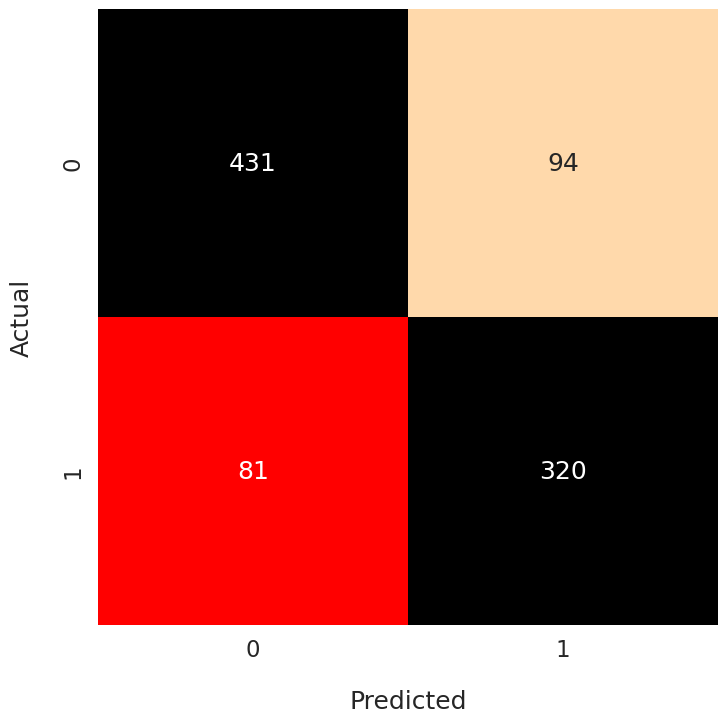

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

## Save model

In [ ]:
import torch

In [ ]:
bert_model=torch.load(classifier.model_save_path)
bert_model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, 

In [ ]:
model_down_path = '/content/drive/MyDrive/Data2/bert_model.pth'
torch.save(bert_model, model_down_path)

## References
- [BERT для классификации русскоязычных текстов](https://habr.com/ru/articles/567028/)
- [News Article Classification Task using SOTA models and their comparison](https://medium.com/mlearning-ai/news-article-classification-task-using-sota-models-and-their-comparison-a0f87abdc0c1)